# N-Armed Bandits
A n-armed bandit is one of the most basic concepts and use-case of Reinforcement Learning.  
Actually, it's not a full RL use-case because there is only 1 state and each action doesn't affect the state.  

Bandits have a set of arms and oulling one of them is associated with a reward. Some arms are better than others but this is unknown in the beginning. By interchanging exploitation and exploration the agent updates its estimates of the action values targeting in maximizing total return (average reward)

In [1]:
%%html
<style>.container {width: 98%}</style>

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
import numpy as np
import matplotlib.pyplot as plt

import sys
sys.path.insert(0, "../")
from fromscratch.rl.bandit import Bandit, EpsilonGreedy

### ε-greedy policy on one bandit

In [20]:
b1 = Bandit(n=4, action_values=[1, 1.2, 1.3, 5])
policy = EpsilonGreedy(epsilon=0.1)

In [21]:
steps = 1000
rewards = np.empty(steps)

for step in range(steps):
    action = policy.select_action(b1.action_values_est)
    r = b1.update_estimate(action)
    
    rewards[step] = r

Text(0, 0.5, 'Reward')

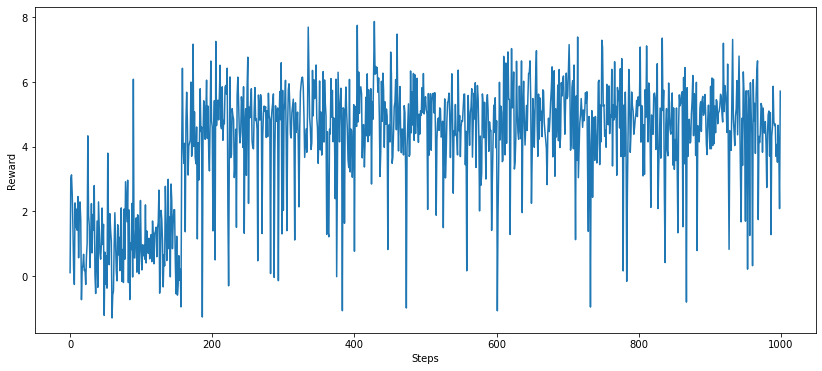

In [22]:
plt.figure(figsize=(14, 6))
plt.plot(range(steps), rewards)
plt.xlabel("Steps")
plt.ylabel("Reward")

#### True vs estimated action values

In [23]:
b1.action_values

[1, 1.2, 1.3, 5]

In [24]:
b1.action_values_est

array([1.16576372, 0.77934355, 1.30519021, 4.59979072])

We observe that after some time-steps and epxloration the optimal action is mostly selected and therefore the reward is maximized

### ε-greedy policy on multiple bandits
We average the performance per time-step of multiple bandits in order to reduce the noise observed in a single bandit

In [25]:
n_bandits = 1000
bandits = [Bandit(n=10) for _ in range(n_bandits)]
policy = EpsilonGreedy(epsilon=0.1)

In [26]:
steps = 2000
rewards = np.empty(steps)
optimal_action = np.empty(steps)

for step in range(steps):
    r_total = 0
    opt_actions = 0
    for b in bandits:
        action = policy.select_action(b.action_values_est)
        r = b.update_estimate(action)
        
        r_total += r
        opt_actions += (action == np.argmax(b.action_values))
    
    rewards[step] = r_total / n_bandits
    optimal_action[step] = opt_actions / n_bandits

Text(0.5, 1.0, 'Average Reward')

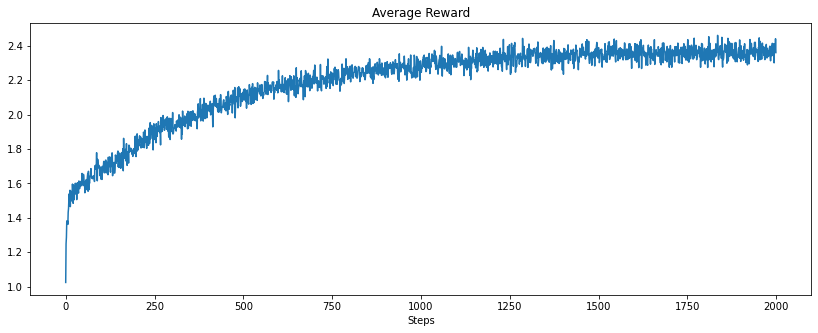

In [27]:
plt.figure(figsize=(14, 5))
plt.plot(range(steps), rewards)

plt.xlabel("Steps")
plt.title("Average Reward")

Text(0.5, 1.0, '% Optimal Action')

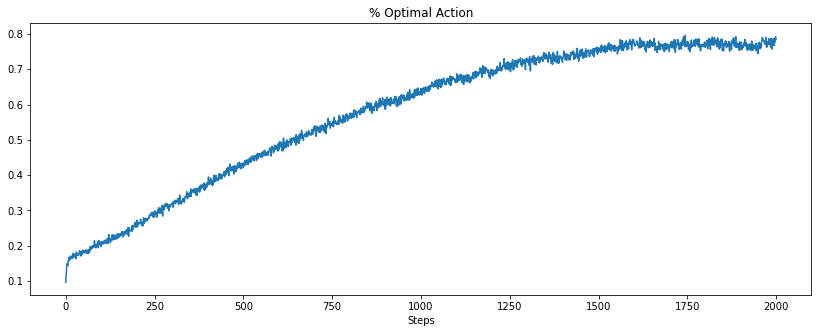

In [28]:
plt.figure(figsize=(14, 5))
plt.plot(range(steps), optimal_action)

plt.xlabel("Steps")
plt.title("% Optimal Action")

We see that the performance increases with time as the action value estimates become better:
- The averge reward is maximized
- The optimal actions is selected more frequently

### Different ε values
It's interesting to comapre the performance for different ε values

Text(0.5, 1.0, 'Average Reward')

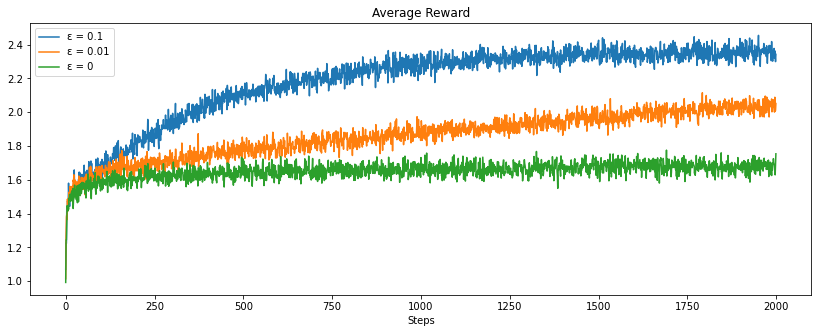

In [29]:
plt.figure(figsize=(14, 5))

for epsilon in [0.1, 0.01, 0]:
    n_bandits = 1000
    bandits = [Bandit(n=10) for _ in range(n_bandits)]
    policy = EpsilonGreedy(epsilon=epsilon)

    steps = 2000
    rewards = np.empty(steps)

    for step in range(steps):
        r_total = 0
        for b in bandits:
            action = policy.select_action(b.action_values_est)
            r = b.update_estimate(action)

            r_total += r

        rewards[step] = r_total / n_bandits

    
    plt.plot(range(steps), rewards, label="ε = " + str(epsilon))

plt.legend()
plt.xlabel("Steps")
plt.title("Average Reward")

We see that the greedy policy (ε = 0) performed poorly comparing to the others, since it always selects the best value according to the initial estimates.  
Also, the policy with more exploration (ε = 0.1) resulted in better performance in the long run.